1) Libraries & Toolkits


In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})



2) Importing Dataset and exploration

In [260]:
df = pd.read_csv('merged_cars.csv')

# data shapes 
print("cars data shape : " , str(df.shape))

# old data shapes 
print("old cars data shape : " , str(df[df['new'] == 0].shape))

# new data shapes
print("new cars data shape : " , str(df[df['new'] == 1].shape))

df.head()



cars data shape :  (31900, 12)
old cars data shape :  (14741, 12)
new cars data shape :  (17159, 12)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
0,Hyundai,Accent,Sedan,Black,2007.0,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza,0
1,Hyundai,Accent,Sedan,Silver,2005.0,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena,0
2,Hyundai,Accent,Sedan,Gray,1999.0,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza,0
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009.0,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo,0
4,Hyundai,Accent,Sedan,Silver,2000.0,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza,0


In [261]:
df.info()

# columns ['Body' , 'Year' , 'Engine' ] have null values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        31900 non-null  object 
 1   Model        31900 non-null  object 
 2   Body         14741 non-null  object 
 3   Color        31900 non-null  object 
 4   Year         31898 non-null  float64
 5   Fuel         31900 non-null  object 
 6   Kilometers   31900 non-null  object 
 7   Engine       14741 non-null  object 
 8   Trasmission  31900 non-null  object 
 9   Price        31900 non-null  object 
 10  Gov          31900 non-null  object 
 11  new          31900 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 2.9+ MB


In [262]:
df.drop_duplicates(inplace=True)

In [263]:
df[df['Year'].isnull()].head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
16602,Hyundai,Accent,NaN,Silver,NaN,diesel,"138,000 Km",NaN,manual,0 EGP,El Haram,1
26885,Volkswagen,Beetle,NaN,Red,NaN,gas,0 Km,NaN,manual,"60,000 EGP",Cairo,1


In [264]:
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})
# Number of uniques values in Data


,,Number of unique values
0,Brand,94
1,Model,828
2,Body,3
3,Color,27
4,Year,58
5,Fuel,7
6,Kilometers,934
7,Engine,3
8,Trasmission,5
9,Price,1347


In [265]:
df.Brand.value_counts()


Brand
Hyundai      7471
Fiat         6148
Chevrolet    5293
Nissan       1115
Kia          1074
             ... 
JMC             1
Bentley         1
Lexus           1
Keyton          1
Perodua         1
Name: count, Length: 94, dtype: int64

3) Data Cleaning

In [266]:
# we can notice that fuel types doesn't make sense due to merged data 
# get the unique values of fuel type
print(df['Fuel'].unique())

# gas and Benzine are the same
df['Fuel'] = df['Fuel'].replace('gas' , 'Benzine')

# diesl and Natural/natural Gas are the same
df['Fuel'] = df['Fuel'].replace('diesel' , 'Natural Gas')
df['Fuel'] = df['Fuel'].replace('natural gas' ,  'Natural Gas')

# get the unique values of fuel type
print(df['Fuel'].unique())




['Benzine' 'Natural Gas' 'gas' 'diesel' 'natural gas' 'Electric' 'Hybrid']
['Benzine' 'Natural Gas' 'Electric' 'Hybrid']


In [267]:
# we can notice that Trasmission types doesn't make sense due to merged data
df.Trasmission = df.Trasmission.replace('automatic' , 'Automatic')
df.Trasmission = df.Trasmission.replace('manual' , 'Manual')

df.Trasmission.unique()

array(['Automatic', 'Manual', 'CVT'], dtype=object)

# 

In [268]:
# fill na value with most freq
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
# let use year value to be int
df['Year'] = df['Year'].astype(int)

print(df['Year'].unique())


[2007 2005 1999 2009 2000 2012 2010 2006 2015 2017 2001 2011 1996 2008
 2020 2013 2019 2014 2016 2022 1998 2002 2021 2004 2003 1994 1997 1995
 2018 1993 1992 1990 1976 1987 1991 1985 1977 1978 1988 1979 1975 1982
 1983 1974 1980 1989 1984 1981 1973 1986 1972 1971 1970 2023 1964 1968
 1951 1969]


In [269]:
# delete km from Kilometers
df.Kilometers = [(value).replace(' Km' , '') for value in df.Kilometers]

df.Kilometers.unique()

array(['140000 to 159999', '180000 to 199999', '10000 to 19999',
       'More than 200000', '90000 to 99999', '100000 to 119999',
       '160000 to 179999', '120000 to 139999', '0 to 9999',
       '20000 to 29999', '30000 to 39999', '80000 to 89999',
       '60000 to 69999', '70000 to 79999', '40000 to 49999',
       '50000 to 59999', '255,000', '130,000', '50,000', '165,000',
       '300,000', '190,000', '129,000', '150,000', '56,000', '51,000',
       '57,000', '120,000', '240,000', '3,000', '7,600', '140,000', '0',
       '31,000', '90,000', '175,000', '400,000', '260,000', '173,000',
       '80,000', '37,000', '200,000', '19,000', '47,000', '135,000',
       '100,000', '95,000', '106,000', '85,000', '128,000', '11,000',
       '20,000', '35,000', '125,000', '148,000', '500', '41,000',
       '82,000', '9,000', '104,000', '40,000', '189,000', '102,000',
       '170,000', '45,000', '241,000', '94,500', '5,800', '55,000',
       '5,000', '97,000', '155,000', '138,000', '30,000', '191,

In [270]:
# delete EGP from Price
df.Price = [(value).replace(' EGP' , '') for value in df.Price]

df.Price.unique()

array(['140.0', '78.0', '70.0', ..., '1,880,000', '496,000', '444,444'],
      dtype=object)

4) Pre-processing & Feature Engineering

In [271]:
# Take copy from Dataset
df_copy = df.copy()

In [272]:
def km_frmt(kilometers):
    meters = {
        '100000 to 119999': 10,
        '90000 to 99999': 9,
        '120000 to 139999': 11,
        'More than 200000': 15,
        '10000 to 19999': 1,
        '180000 to 199999': 14,
        '140000 to 159999': 12,
        '160000 to 179999': 13,
        '20000 to 29999': 2,
        '30000 to 39999': 3,
        '80000 to 89999': 8,
        '70000 to 79999': 7,
        '0 to 9999': 0,
        '60000 to 69999': 6,
        '40000 to 49999': 4,
        '50000 to 59999': 5
    }

    if kilometers in meters:
        return meters[kilometers]
    else :
        kilometers = (kilometers).replace(',' , '')
        return int(kilometers) // 10000

def color_frmt(color):
    # format categorical color to numerical
    colors = dict(zip(df['Color'].unique() , range(len(df['Color'].unique()))))
    return colors[color]

def engine_frmt(engine):
    if engine == 'More than 3000 CC':
            return 3.0
    elif engine == '1600 CC':
        return 1.6
    elif engine == '1400 - 1500 CC' :
        return 1.5
    elif engine == '1000 - 1300 CC':
        return 1.2
    elif engine  == '1800 - 2000 CC':
        return 2.0
    else:
        return 2.5
    
def fuel_frmt(fuel):
    # format categorical fuel to numerical
    fuels = dict(zip(df['Fuel'].unique() , range(len(df['Fuel'].unique()))))
    return fuels[fuel]

def brand_frmt(brand):
    # format categorical brand to numerical
    brands = dict(zip(df['Brand'].unique() , range(len(df['Brand'].unique()))))
    return brands[brand]

def price_frmt(price):
    if ',' in price:
        price = (price).replace(',' , '')
        price = int(price) // 1000
        return float(price)
    return float(price)

colors = dict(zip(range(len(df['Color'].unique())) , df['Color'].unique()))
fuels = dict(zip(range(len(df['Fuel'].unique())) , df['Fuel'].unique()))
brands = dict(zip(range(len(df['Brand'].unique())) , df['Brand'].unique()))

print("colors" ,dict(zip(df['Color'].unique() , range(len(df['Color'].unique())))))
print("fuels" ,dict(zip(df['Fuel'].unique() , range(len(df['Fuel'].unique())))))
print("brands" ,dict(zip(df['Brand'].unique() , range(len(df['Brand'].unique())))))

colors {'Black': 0, 'Silver': 1, 'Gray': 2, 'Blue- Navy Blue': 3, 'Green': 4, 'Red': 5, 'Gold': 6, 'Other Color': 7, 'Burgundy': 8, 'White': 9, 'Yellow': 10, 'Brown': 11, 'Orange': 12, 'Beige': 13, 'Bronze': 14, 'Dark blue': 15, 'Cyan': 16, 'Dark red': 17, 'Champagne': 18, 'Blue': 19, 'Mocha': 20, 'Petroleum': 21, 'Light grey': 22, 'Dark green': 23, 'Purple': 24, 'Eggplant': 25, 'Olive': 26}
fuels {'Benzine': 0, 'Natural Gas': 1, 'Electric': 2, 'Hybrid': 3}
brands {'Hyundai': 0, 'Chevrolet': 1, 'Fiat': 2, 'BMW': 3, 'Opel': 4, 'Mitsubishi': 5, 'Mercedes': 6, 'Honda': 7, 'MG': 8, 'Nissan': 9, 'Mazda': 10, 'Skoda': 11, 'Chery': 12, 'Lada': 13, 'Kia': 14, 'Daewoo': 15, 'Daihatsu': 16, 'Seat': 17, 'Speranza': 18, 'Volkswagen': 19, 'Jac': 20, 'Brilliance': 21, 'Suzuki': 22, 'Ssang Yong': 23, 'Toyota': 24, 'Renault': 25, 'Byd': 26, 'Jetour': 27, 'Peugeot': 28, 'Jeep': 29, 'Citroën': 30, 'Alfa Romeo': 31, 'Dodge': 32, 'DFSK': 33, 'Geely': 34, 'Proton': 35, 'Mahindra': 36, 'Isuzu': 37, 'Ford': 

In [273]:
# format categorical features
df_copy.Kilometers = df_copy.Kilometers.apply(km_frmt)
df_copy.Color = df_copy.Color.apply(color_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_frmt)
df_copy.Fuel = df_copy.Fuel.apply(fuel_frmt)
df_copy.Brand = df_copy.Brand.apply(brand_frmt)
df_copy.Price = df_copy.Price.apply(price_frmt)


In [274]:
# Some Features Engineerning
df_copy["Car Age"] = 2023 - df_copy["Year"]
df_copy = df_copy.drop(columns = ["Year"])
df['Price'] = df_copy['Price']
df['Price'] = df['Price'].apply(lambda e : round(e ,2))

In [275]:
df_copy.sample(10)


,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new,Car Age
201,0,Accent,Sedan,2,0,0,1.2,Manual,135.0,Alexandria,0,13
4184,0,Elantra,Sedan,1,0,1,1.6,Automatic,243.8,Alexandria,0,8
3749,0,Elantra,Sedan,0,0,11,1.6,Automatic,316.2,Alexandria,0,5
18820,4,Vectra,NaN,15,0,30,2.5,Manual,70.0,Shobra,1,29
22814,9,Qashqai,NaN,0,0,7,2.5,Automatic,510.0,Giza,1,6
6270,1,Aveo,Sedan,5,0,9,1.5,Manual,99.0,Cairo,0,15
18923,6,GLC 200,NaN,0,0,0,2.5,Automatic,3100.0,Alexandria,1,1
8060,1,Aveo,Sedan,11,0,11,1.5,Automatic,155.2,Kafr al-Sheikh,0,5
256,0,Accent,Sedan,0,0,10,1.5,Automatic,220.0,Alexandria,0,6
1989,0,Verna,Sedan,1,1,15,1.6,Manual,115.0,Red Sea,0,12


In [276]:
df_copy.dtypes


Brand            int64
Model           object
Body            object
Color            int64
Fuel             int64
Kilometers       int64
Engine         float64
Trasmission     object
Price          float64
Gov             object
new              int64
Car Age          int64
dtype: object

In [277]:
# Converting categorical features

nums = [] 
lbl= LabelEncoder()

for col in df_copy.loc[ : , df_copy.dtypes == object].columns:
    df_copy[col] = lbl.fit_transform(df_copy[col])
    # To know the meaning of numbers
    directory = {index: label for index , label  in enumerate(lbl.classes_)}
    nums.append(directory)
nums


[{0: '100',
  1: '104',
  2: '11',
  3: '1100',
  4: '116',
  5: '118',
  6: '120',
  7: '1200',
  8: '121',
  9: '124',
  10: '125',
  11: '126',
  12: '127',
  13: '128',
  14: '1300',
  15: '131',
  16: '132',
  17: '133',
  18: '146',
  19: '1500',
  20: '156',
  21: '16',
  22: '18',
  23: '180',
  24: '180B',
  25: '19',
  26: '190',
  27: '2 || Mazda 2',
  28: '200',
  29: '2008',
  30: '2017',
  31: '205',
  32: '206',
  33: '207',
  34: '207 SW',
  35: '208',
  36: '2101',
  37: '2103',
  38: '2104',
  39: '2105',
  40: '2106',
  41: '2107',
  42: '2110',
  43: '2112',
  44: '218',
  45: '218 i',
  46: '220',
  47: '230',
  48: '232',
  49: '240',
  50: '240Z',
  51: '244',
  52: '250',
  53: '280',
  54: '3',
  55: '3  || Mazda 3',
  56: '3 Series',
  57: '3 || Mazda 3',
  58: '300',
  59: '3008',
  60: '301',
  61: '304',
  62: '305',
  63: '307',
  64: '308',
  65: '308 sw',
  66: '316',
  67: '318',
  68: '320',
  69: '323',
  70: '325',
  71: '328',
  72: '330',
  73: '33

In [278]:
df_copy

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new,Car Age
0,0,140,2,0,0,12,1.6,0,140.0,46,0,16
1,0,140,2,1,0,14,1.2,2,78.0,82,0,18
2,0,140,2,2,0,12,1.5,2,70.0,46,0,24
3,0,140,2,3,0,12,1.6,0,150.0,19,0,14
4,0,140,2,1,0,1,1.2,2,75.0,46,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
31761,61,126,3,5,0,17,2.5,0,625.0,100,1,10
31788,3,789,3,22,0,6,2.5,0,1650.0,92,1,6
31824,2,601,3,23,0,20,2.5,2,60.0,2,1,28
31882,1,551,3,5,0,7,2.5,2,290.0,30,1,2


<Axes: >

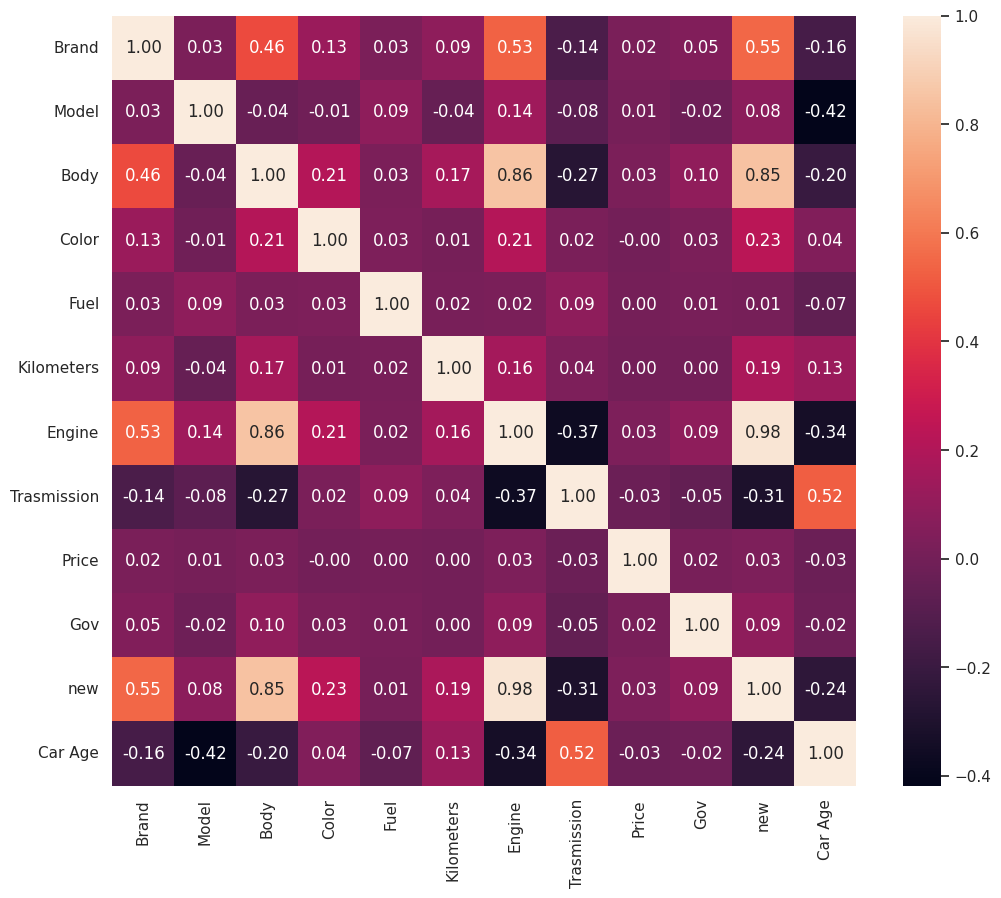

In [279]:
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

## Question Answering

### Q1. What are the highest and lowest prices of cars in the data and the highest and lowest mean for all brands’ prices?


<Axes: >

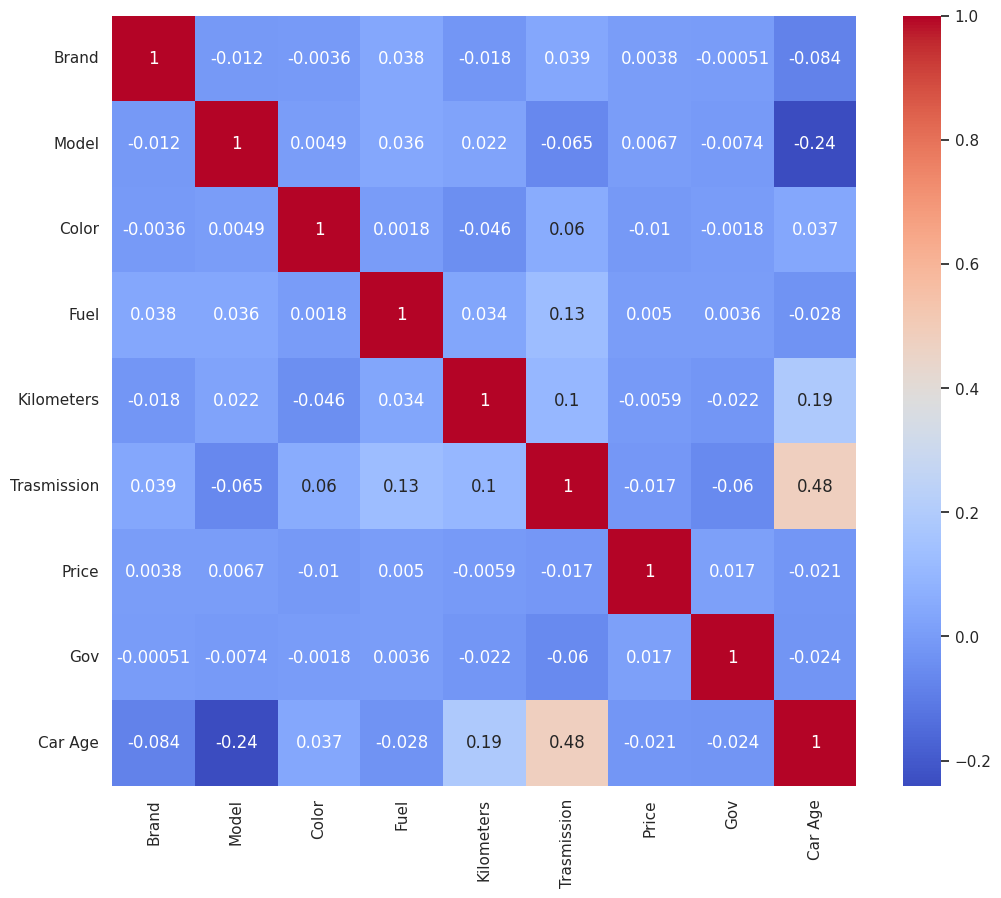

In [280]:
'''
First of all we have some prices equal to zero
It seems that there is a problem in the data collection process
We will add the prices of the cars with the same brand, model and Car age and divide them by the number of cars
'''

# By intution the price of the car is related to the brand, model and Car age
# But let's do some EDA to see the correlation between the price and the other features

df_filtered = df_copy[df_copy['Price'] != 0]
df_filtered = df_filtered[df_filtered['new'] == 1].drop(columns = ['new', 'Body','Engine'])
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [281]:
missing_prices = df_copy[df_copy['Price'] == 0]
mean_prices = df_copy[df_copy['Price'] != 0].groupby(['Brand', 'Model', 'Car Age'])['Price'].mean()
# Replace the missing or zero values with the calculated mean
df_allfilled = df_copy.copy()
df_allfilled = df_allfilled[df_allfilled['new'] == 1].drop(columns = ['new', 'Body','Engine'])
missing_prices['Price'] = missing_prices.apply(lambda row: mean_prices[(row['Brand'], row['Model'], row['Car Age'])] if (row['Brand'], row['Model'], row['Car Age']) in mean_prices.index else row['Price'] , axis=1)
missing_prices['Price'] = missing_prices['Price'].apply(lambda e : round(e ,2))
df_allfilled.update(missing_prices)

In [282]:
# Drop All rows with prce less than 15 as they all Fake ads
df_allfilled.drop(df_allfilled[df_allfilled['Price'] < 15].index, inplace=True)
# Drop more fake ads (The price more than 20000)
df_allfilled.drop(df_allfilled[df_allfilled['Price'] >= 20000].index, inplace=True)

In [283]:
df_allfilled['Price'].unique().shape

(679,)

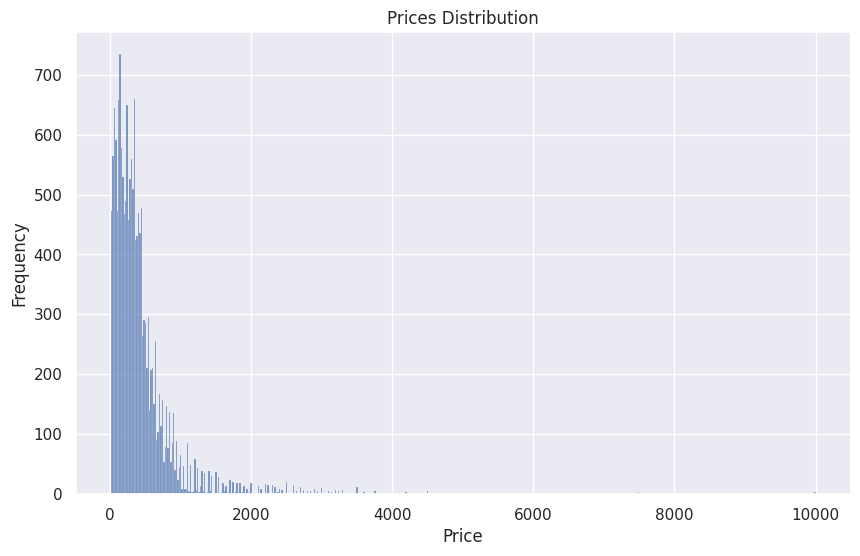

In [284]:
# Draw Prices Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_allfilled['Price'], bins=500)
plt.title('Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [285]:
list(brands.values())

['Hyundai',
 'Chevrolet',
 'Fiat',
 'BMW',
 'Opel',
 'Mitsubishi',
 'Mercedes',
 'Honda',
 'MG',
 'Nissan',
 'Mazda',
 'Skoda',
 'Chery',
 'Lada',
 'Kia',
 'Daewoo',
 'Daihatsu',
 'Seat',
 'Speranza',
 'Volkswagen',
 'Jac',
 'Brilliance',
 'Suzuki',
 'Ssang Yong',
 'Toyota',
 'Renault',
 'Byd',
 'Jetour',
 'Peugeot',
 'Jeep',
 'Citroën',
 'Alfa Romeo',
 'Dodge',
 'DFSK',
 'Geely',
 'Proton',
 'Mahindra',
 'Isuzu',
 'Ford',
 'Canghe || Changhe',
 'Faw',
 'Haval',
 'Mini',
 'Foton',
 'Senova',
 'Zotye',
 'Karry',
 'Volvo',
 'Changan',
 'Land Rover',
 'Gmc',
 'Subaru',
 'Saipa',
 'Baic',
 'Infiniti',
 'Great Wall',
 'Kenbo',
 'Dongfeng',
 'Ds',
 'Jaguar',
 'Hawtai',
 'Audi',
 'Hafei',
 'Chrysler',
 'Datsun',
 'Lincoln',
 'Emgrand',
 'Victory',
 'Soueast',
 'Lifan',
 'Lancia',
 'Chana',
 'Bestune',
 'Cupra',
 'Haima',
 'Tesla',
 'Porsche',
 'Landwind',
 'JMC',
 'Kaiyi',
 'Cadillac',
 'Aston Martin',
 'Smart',
 'Maserati',
 'Pontiac',
 'Canghe  || Changhe',
 'Exeed',
 'Buick',
 'Hummer',
 '

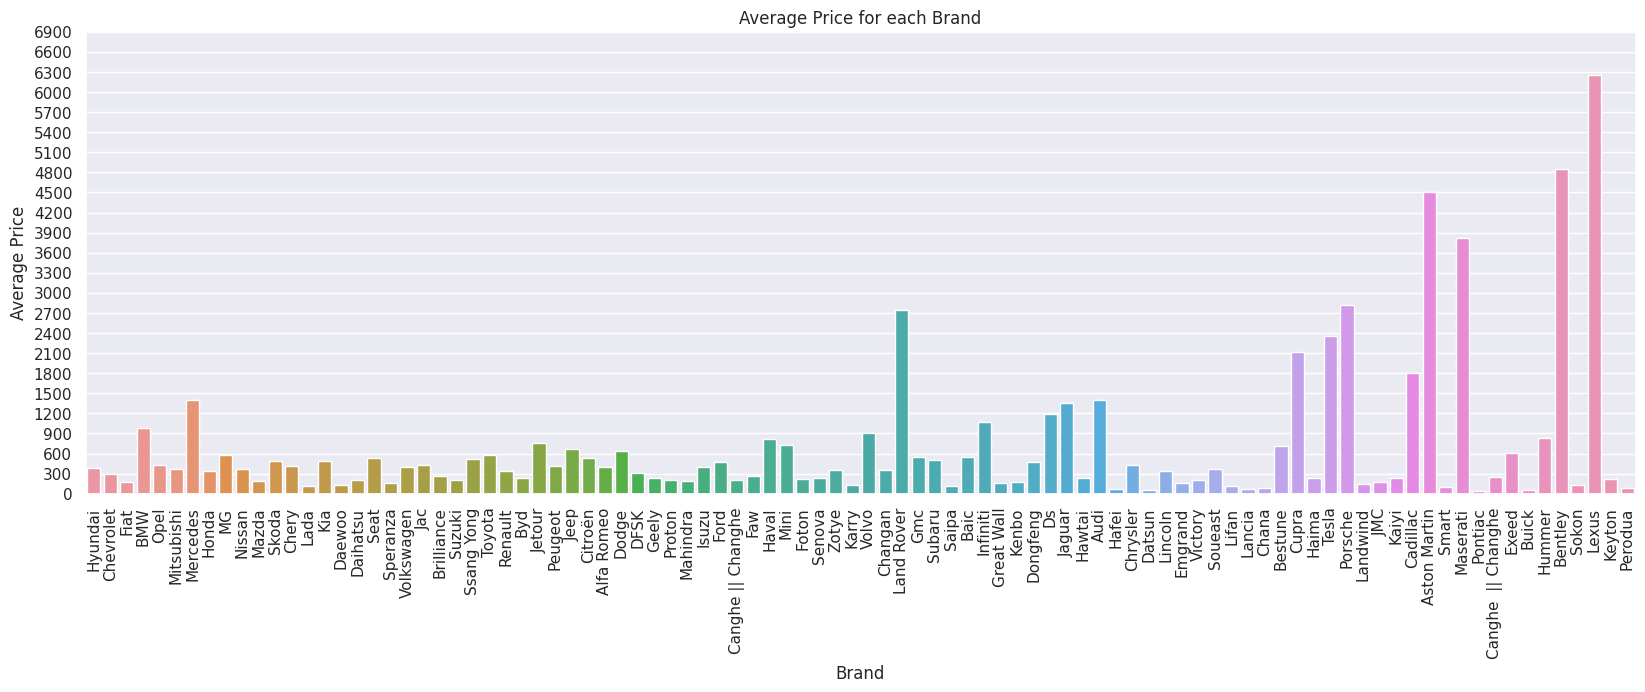

In [286]:
brand_prices = df_allfilled.groupby('Brand')['Price'].mean()
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=list(brands.values()), y=brand_prices.values)
# Change y axis to have smaller steps
ax.set_yticks(np.arange(0, 7000,300))
plt.title('Average Price for each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [287]:

highest_price = df_allfilled["Price"].max()
lowest_price = df_allfilled["Price"].min()
highest_mean = df_allfilled.groupby("Brand")["Price"].mean().max()
lowest_mean = df_allfilled.groupby("Brand")["Price"].mean().min()

print("Highest Price: ", highest_price)
print("Lowest Price: ", lowest_price)
print("Highest Mean: ", highest_mean)
print("Lowest Mean: ", lowest_mean)

Highest Price:  10000.0
Lowest Price:  15.0
Highest Mean:  6250.0
Lowest Mean:  37.0


### Q2. Does changing car color affect car price for the same car model for the collected dataset?

In [291]:
# we need to see the relation between the color and the price for same car model
# so we will group by the model and the color and get the mean of the price
# then we will plot the relation between the color and the price
models =  {v: k for k, v in nums[0].items()}

model_color_price = df_allfilled.groupby(['Brand' , 'Model'  ,'Fuel', 'Car Age' ,'Trasmission', 'Color' ])['Price'].mean().reset_index()
model_color_price['Color'] = model_color_price['Color'].apply(lambda e : colors[e])
model_color_price['Brand'] = model_color_price['Brand'].apply(lambda e : brands[e])
model_color_price['Model'] = model_color_price['Model'].apply(lambda e : nums[0][e])
model_color_price['Fuel'] = model_color_price['Fuel'].apply(lambda e : fuels[e])
model_color_price['Trasmission'] = model_color_price['Trasmission'].apply(lambda e : nums[2][e])

model_color_price['grouping'] = model_color_price['Brand'] + ' ' + model_color_price['Model'] + ' ' + model_color_price['Fuel'].astype(str) + ' ' + model_color_price['Trasmission'].astype(str) + ' ' + model_color_price['Car Age'].astype(str)
model_color_price[model_color_price['Brand'] == 'Mitsubishi']

,Brand,Model,Fuel,Car Age,Trasmission,Color,Price,grouping
2958,Mitsubishi,ASX,Natural Gas,15,Manual,White,300.0,Mitsubishi ASX Natural Gas Manual 15
2959,Mitsubishi,Attrage,Benzine,0,Automatic,White,450.0,Mitsubishi Attrage Benzine Automatic 0
2960,Mitsubishi,Attrage,Benzine,7,Automatic,Silver,260.0,Mitsubishi Attrage Benzine Automatic 7
2961,Mitsubishi,Attrage,Benzine,8,Automatic,Silver,240.0,Mitsubishi Attrage Benzine Automatic 8
2962,Mitsubishi,Attrage,Benzine,8,Automatic,Gray,250.0,Mitsubishi Attrage Benzine Automatic 8
...,...,...,...,...,...,...,...,...
3251,Mitsubishi,Xpander,Benzine,3,Automatic,Gray,580.0,Mitsubishi Xpander Benzine Automatic 3
3252,Mitsubishi,Xpander,Benzine,4,Automatic,Black,725.0,Mitsubishi Xpander Benzine Automatic 4
3253,Mitsubishi,Xpander,Benzine,4,Automatic,Red,620.0,Mitsubishi Xpander Benzine Automatic 4
3254,Mitsubishi,Xpander,Benzine,4,Automatic,Dark red,700.0,Mitsubishi Xpander Benzine Automatic 4


['Hyundai Accent Benzine Automatic 0'
 'Hyundai Accent Benzine Automatic 11'
 'Hyundai Accent Benzine Automatic 12' ...
 'Lexus LX 570 Benzine Automatic 5' 'Keyton M70 Benzine Manual 2'
 'Perodua Kancil Benzine Automatic 22'] 4463


<Axes: xlabel='grouping', ylabel='Price'>

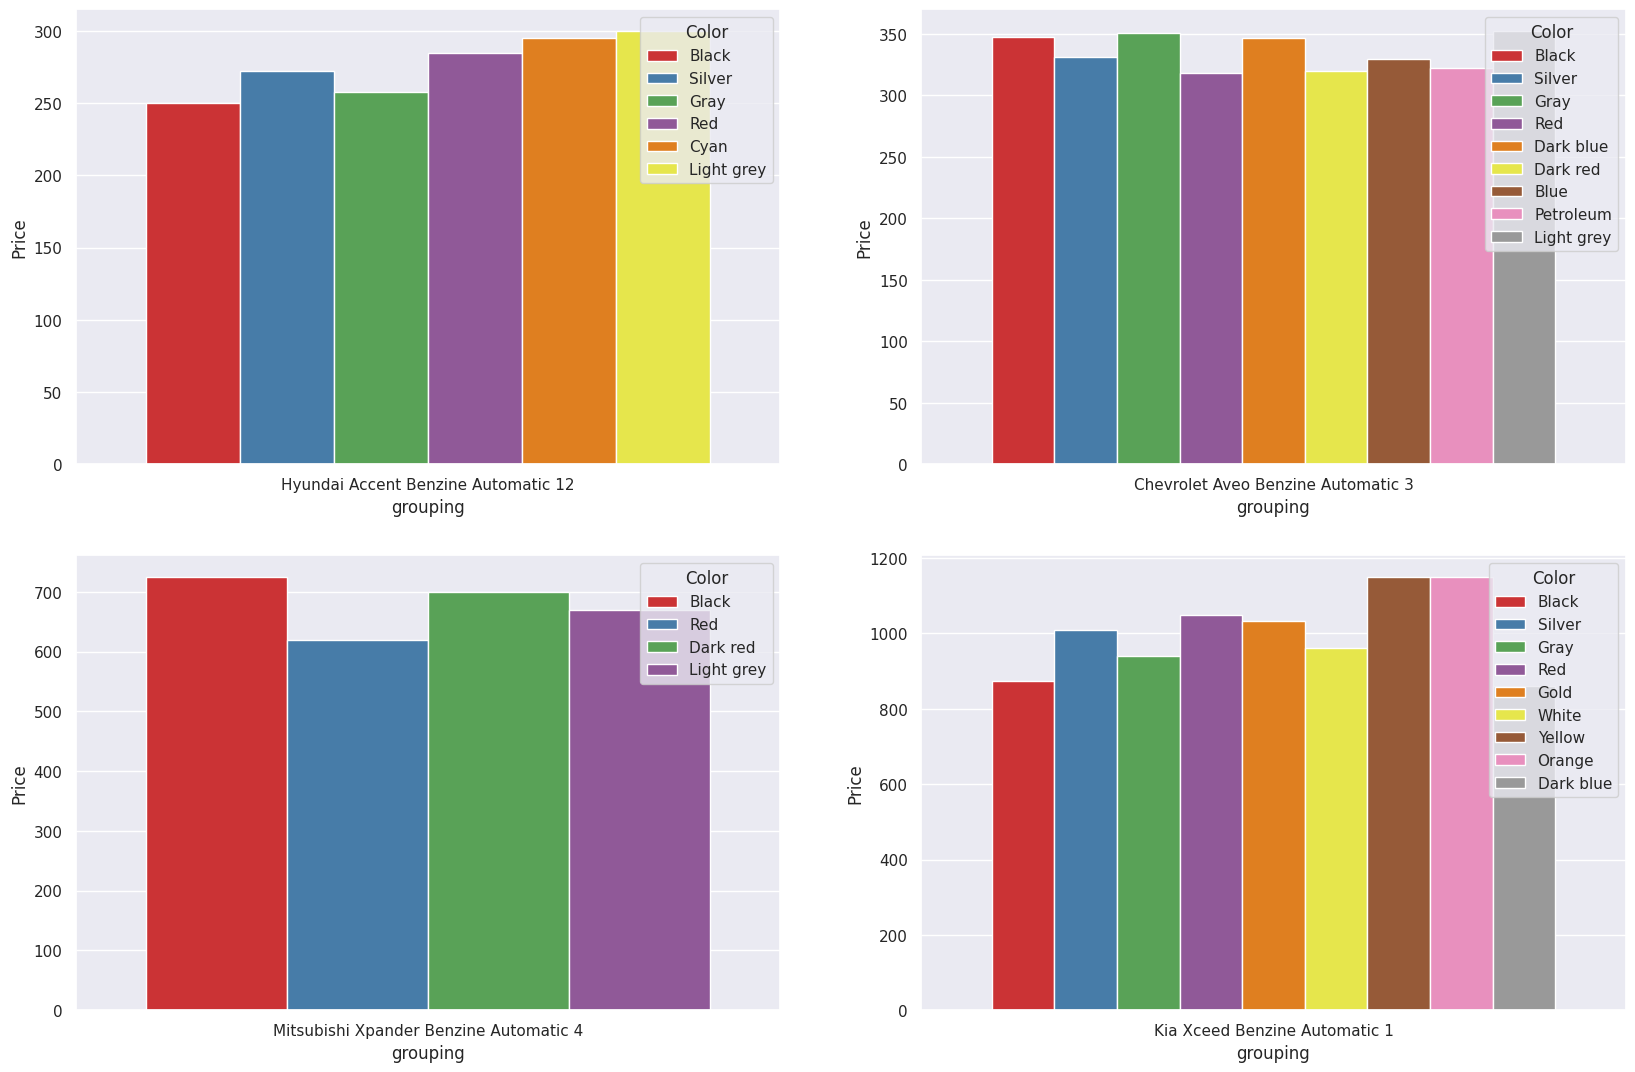

In [293]:
fig, axs = plt.subplots(2, 2, figsize=(20, 13))

print(model_color_price['grouping'].unique() , len(model_color_price['grouping'].unique()))

sns.categorical.barplot(ax = axs[0,0] ,x='grouping', y='Price', data=model_color_price[(model_color_price['grouping'] == 'Hyundai Accent Benzine Automatic 12')], hue='Color', palette='Set1')
sns.categorical.barplot(ax = axs[0,1] , x='grouping', y='Price', data=model_color_price[(model_color_price['grouping'] == 'Chevrolet Aveo Benzine Automatic 3')], hue='Color', palette='Set1')
sns.categorical.barplot(ax = axs[1,0] , x='grouping', y='Price', data=model_color_price[(model_color_price['grouping'] == 'Mitsubishi Xpander Benzine Automatic 4')], hue='Color', palette='Set1')
sns.categorical.barplot(ax = axs[1,1] , x='grouping', y='Price', data=model_color_price[(model_color_price['grouping'] == 'Kia Xceed Benzine Automatic 1')], hue='Color', palette='Set1')

# as we can show the relation between the color and the price for same car model
# so we will group by the model and the color and get the mean of the price
# then we will plot the relation between the color and the price
# according to plots : we can visualize the relation between the color and the price for same car specifications

### Q3. Is there a statistically significant difference in the average price of cars sold in Egypt between cars with manual and automatic transmissions?


In [294]:
from scipy.stats import ttest_ind
manual_prices = df_allfilled[df_allfilled['Trasmission'] == 2]['Price']
auto_prices = df_allfilled[df_allfilled['Trasmission'] == 0]['Price']

manual_mean = manual_prices.mean()
auto_mean = auto_prices.mean()

print("Manual Mean: ", round(manual_mean,3) ,"K")
print("Auto Mean: ", round(auto_mean,3), "K")

# The null hypothesis is that there is no difference between the means of the two groups
# The alternative hypothesis is that there is a difference between the means of the two groups

t_stat , p_value = ttest_ind(manual_prices, auto_prices)
print("t_stat: ", t_stat)
print("p_value: ", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")


Manual Mean:  154.131 K
Auto Mean:  589.799 K
t_stat:  -56.44742393389856
p_value:  0.0
Reject the null hypothesis


{0: 'Automatic', 1: 'CVT', 2: 'Manual'}
Trasmission
0    10840
2     6008
1        6
Name: count, dtype: int64


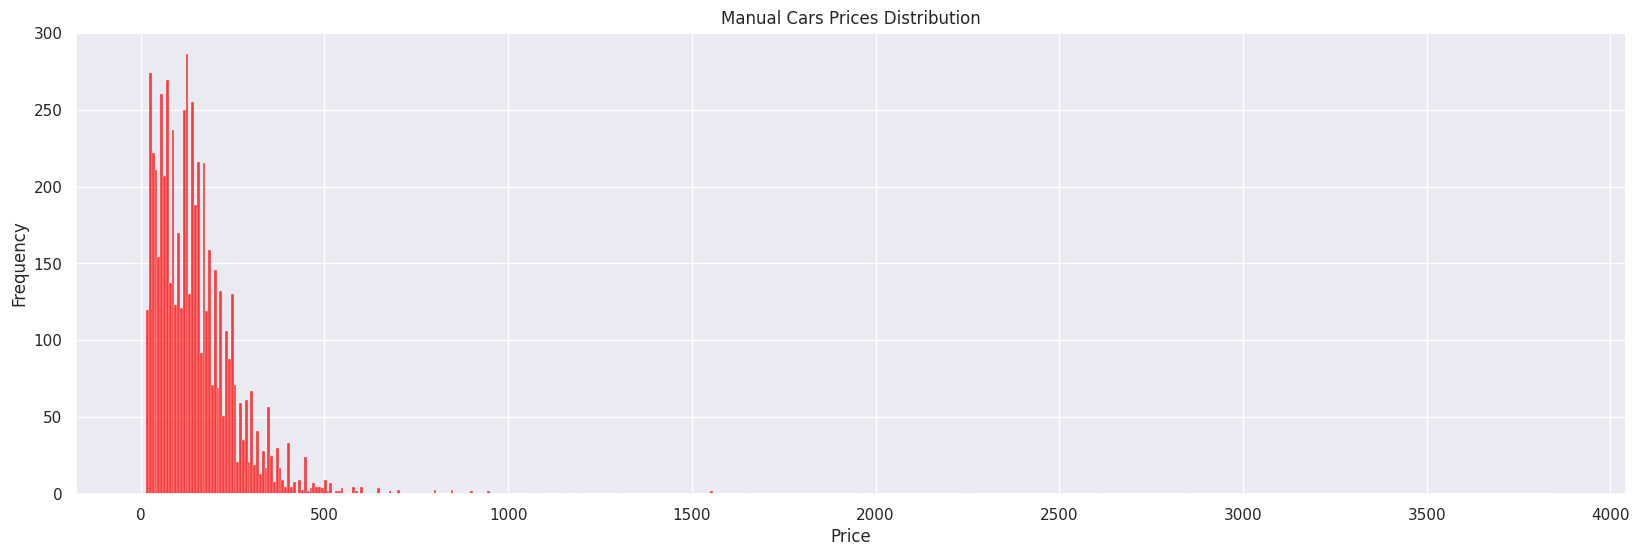

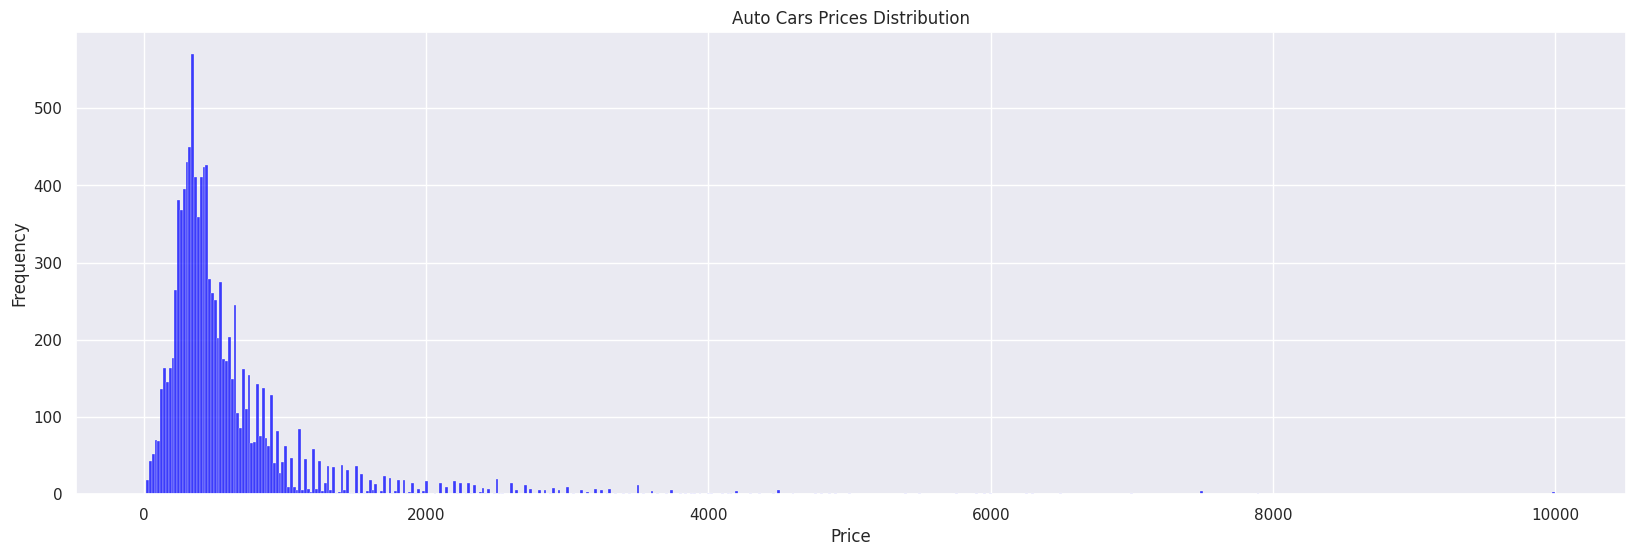

([<matplotlib.axis.XTick at 0x7fa09a3b69d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

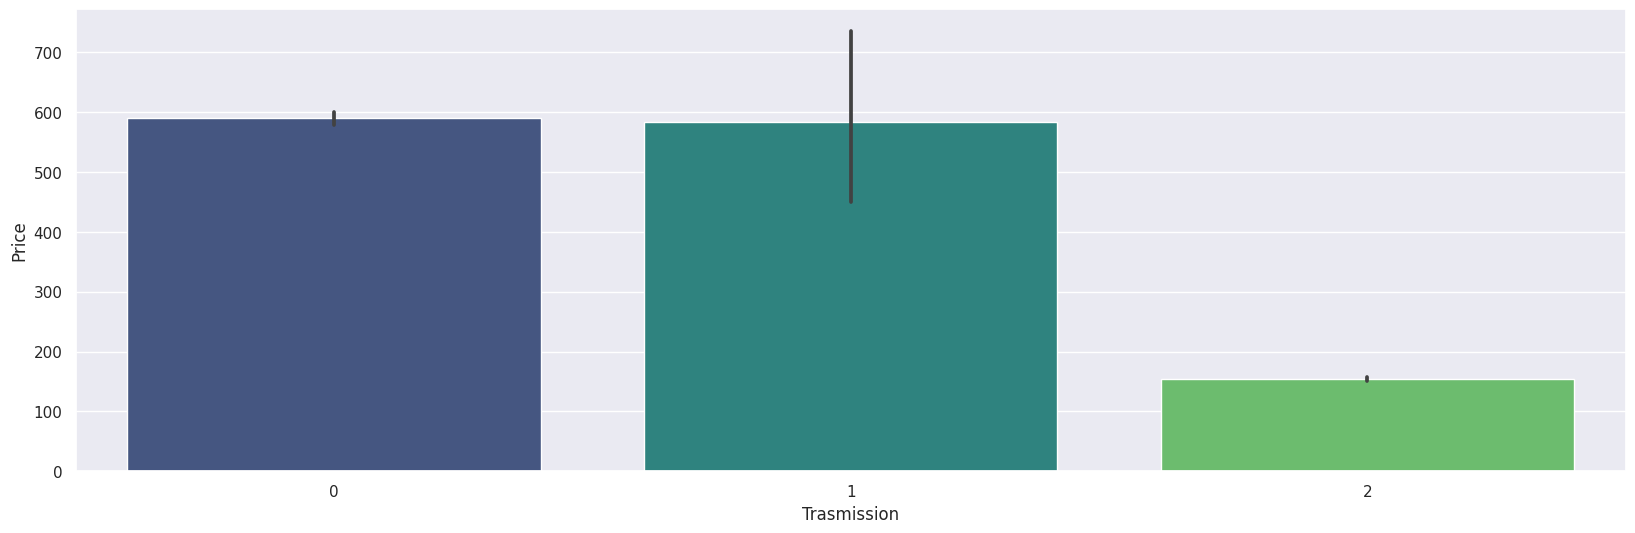

In [295]:
# Some plots for Manual and Auto cars
print(nums[2])
print(df_allfilled.Trasmission.value_counts())

plt.figure(figsize=(20, 6))
sns.histplot(manual_prices, bins=500, color='red')
plt.title('Manual Cars Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20, 6))
sns.histplot(auto_prices, bins=500, color='blue')
plt.title('Auto Cars Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20, 6))
sns.barplot(x = df_allfilled["Trasmission"], y = df_allfilled["Price"] , palette='viridis')
# Change x axis values
plt.xticks(np.arange(3), list(nums[2].keys()))

### Q4. Does it always happen that the cars with the highest kilometers have the lowest price?

Correlation coefficient: -0.25


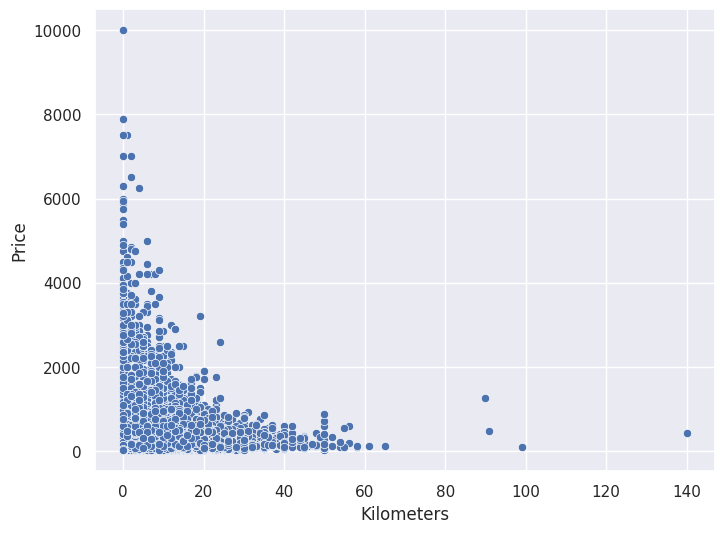

In [296]:
plt.figure(figsize=(8, 6))

# Create a scatter plot of kilometers traveled vs. price
sns.scatterplot(data=df_allfilled, x="Kilometers", y="Price")

# Calculate the correlation coefficient between kilometers traveled and price
correlation = df_allfilled["Kilometers"].corr(df_allfilled["Price"])

# Print the correlation coefficient
print(f"Correlation coefficient: {correlation:.2f}")

# as shown in the following plot and the correlation coefficient

# the correlation between kilometers and price is negative
# so there is a negative relation between kilometers and price (as kilometers increase the price decrease)



### Q5. Does the government in which a car is sold have a causal effect on its selling price in the Egyptian used car market?

In [313]:
# Add kilometers group column to dataframe
# In order to group the cars that have approximately the same kilometers (+- 10000)

bin_size = 5
df_allfilled["Kilometers Group"] = df_allfilled["Kilometers"] // bin_size * bin_size
df_allfilled["Kilometers Group"].unique()

array([ 25,  10,   5,  15,  30,  20,   0,  40,  35,  50,  55,  45,  90,
        65,  95, 140,  60])

In [322]:
# We will get the same car specifications for different Gov and get the mean of the price
gov_price = df_allfilled.groupby(['Brand' , 'Model'  ,'Fuel', 'Car Age' ,'Trasmission', 'Kilometers Group' , 'Gov' ])['Price'].mean().reset_index()
gov_price['Gov'] = gov_price['Gov'].apply(lambda e : nums[3][e])
gov_price['Brand'] = gov_price['Brand'].apply(lambda e : brands[e])
gov_price['Model'] = gov_price['Model'].apply(lambda e : nums[0][e])
gov_price['Fuel'] = gov_price['Fuel'].apply(lambda e : fuels[e])
gov_price['Trasmission'] = gov_price['Trasmission'].apply(lambda e : nums[2][e])

gov_price['grouping'] = gov_price['Brand'] + ' ' + gov_price['Model'] + ' ' + gov_price['Fuel'].astype(str) + ' ' + gov_price['Trasmission'].astype(str) + ' ' + gov_price['Car Age'].astype(str) + ' ' + gov_price['Kilometers Group'].astype(str) 
gov_price[gov_price['Brand'] == 'Chevrolet'].head(10)

,Brand,Model,Fuel,Car Age,Trasmission,Kilometers Group,Gov,Price,grouping
1651,Chevrolet,Aveo,Benzine,3,Automatic,0,Kafr el-Sheikh,372.5,Chevrolet Aveo Benzine Automatic 3 0
1652,Chevrolet,Aveo,Benzine,3,Automatic,0,Nasr city,345.0,Chevrolet Aveo Benzine Automatic 3 0
1653,Chevrolet,Aveo,Benzine,3,Automatic,5,6 October,320.0,Chevrolet Aveo Benzine Automatic 3 5
1654,Chevrolet,Aveo,Benzine,3,Automatic,5,Al Shorouk,330.0,Chevrolet Aveo Benzine Automatic 3 5
1655,Chevrolet,Aveo,Benzine,3,Automatic,5,Cairo,375.0,Chevrolet Aveo Benzine Automatic 3 5
1656,Chevrolet,Aveo,Benzine,3,Automatic,5,Damietta,367.0,Chevrolet Aveo Benzine Automatic 3 5
1657,Chevrolet,Aveo,Benzine,3,Automatic,5,Maadi,340.0,Chevrolet Aveo Benzine Automatic 3 5
1658,Chevrolet,Aveo,Benzine,3,Automatic,5,Obour City,330.0,Chevrolet Aveo Benzine Automatic 3 5
1659,Chevrolet,Aveo,Benzine,3,Automatic,5,Sharqia,320.0,Chevrolet Aveo Benzine Automatic 3 5
1660,Chevrolet,Aveo,Benzine,3,Automatic,5,Sohag,340.0,Chevrolet Aveo Benzine Automatic 3 5


<Axes: xlabel='grouping', ylabel='Price'>

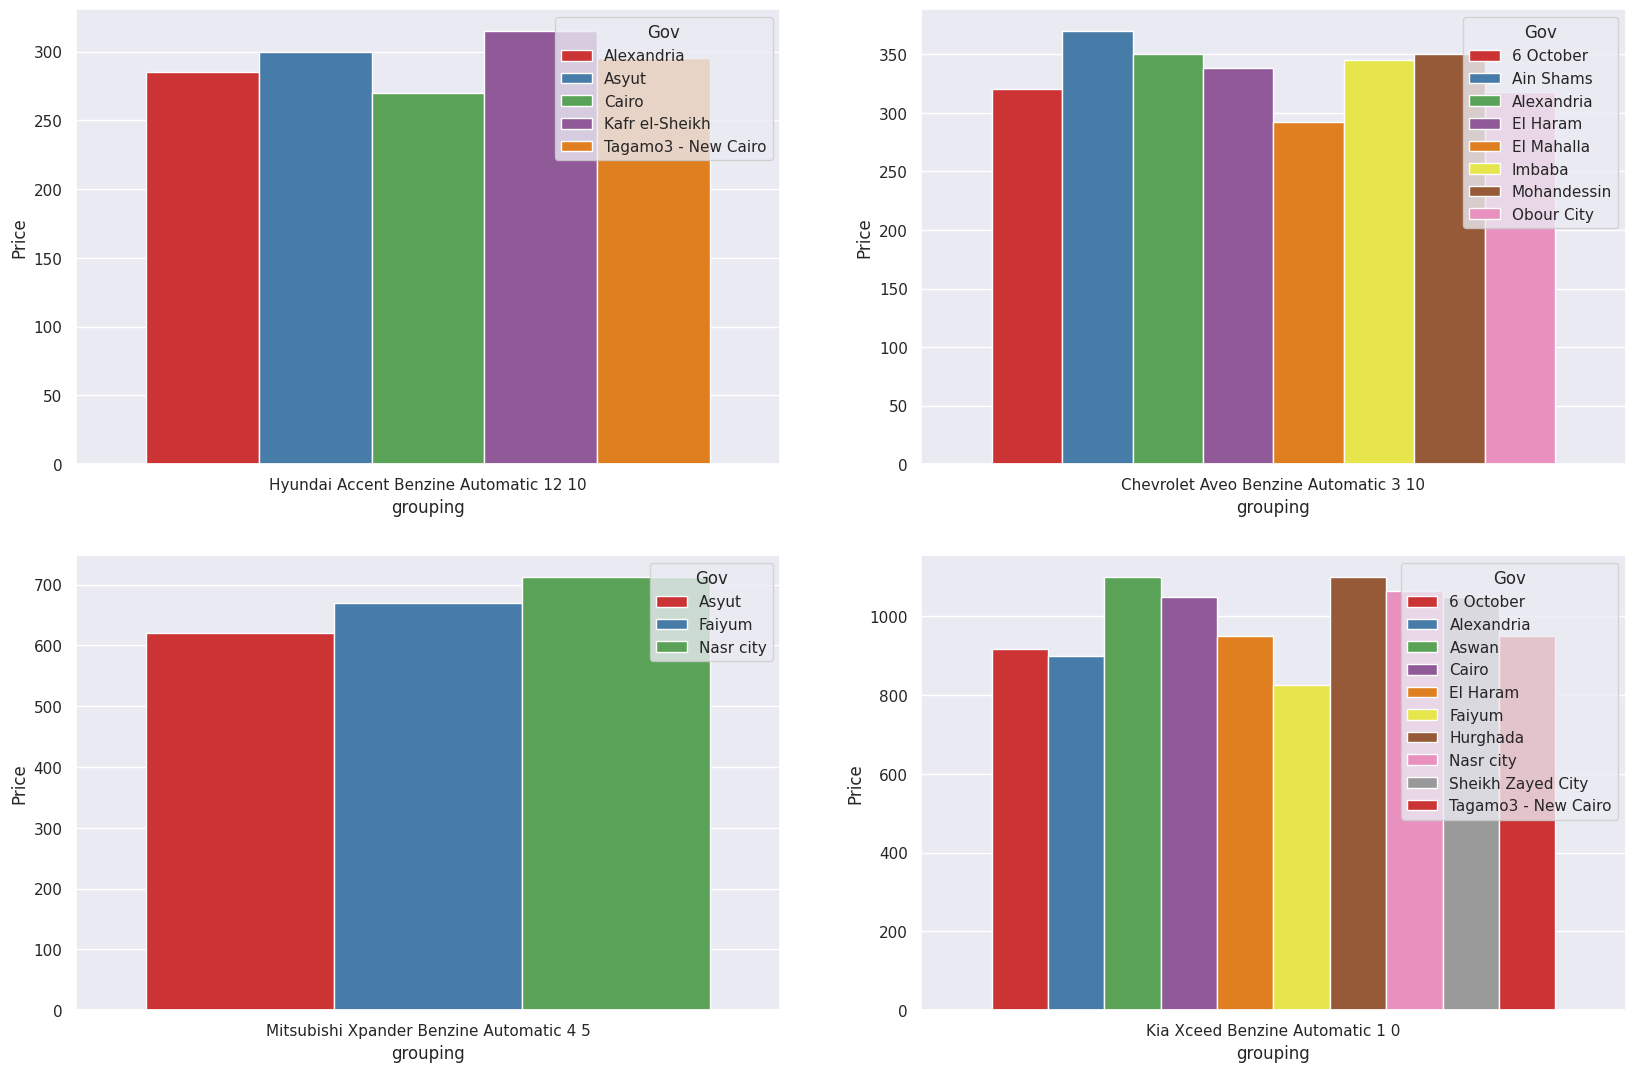

In [321]:
fig, axs = plt.subplots(2, 2, figsize=(20, 13))

sns.categorical.barplot(ax = axs[0,0] ,x='grouping', y='Price', data=gov_price[(gov_price['grouping'] == 'Hyundai Accent Benzine Automatic 12 10')], hue='Gov', palette='Set1')
sns.categorical.barplot(ax = axs[0,1] , x='grouping', y='Price', data=gov_price[(gov_price['grouping'] == 'Chevrolet Aveo Benzine Automatic 3 10')], hue='Gov', palette='Set1')
sns.categorical.barplot(ax = axs[1,0] , x='grouping', y='Price', data=gov_price[(gov_price['grouping'] == 'Mitsubishi Xpander Benzine Automatic 4 5')], hue='Gov', palette='Set1')
sns.categorical.barplot(ax = axs[1,1] , x='grouping', y='Price', data=gov_price[(gov_price['grouping'] == 'Kia Xceed Benzine Automatic 1 0')], hue='Gov', palette='Set1')

-   As shown in the previous figure the change in prices for the same car in different government is not significant, so we can say that the government in which a car is sold does not have a causal effect on its selling price in the Egyptian used car market.

-   The difference does not excced more than 50k EGP. which is not a big difference.

Q6 . How does inflation affect the prices of all brands?


New Cars Shape:  (4172, 12)
Old Cars Shape:  (14740, 12)
Old Cars after drop Shape:  (5896, 12)


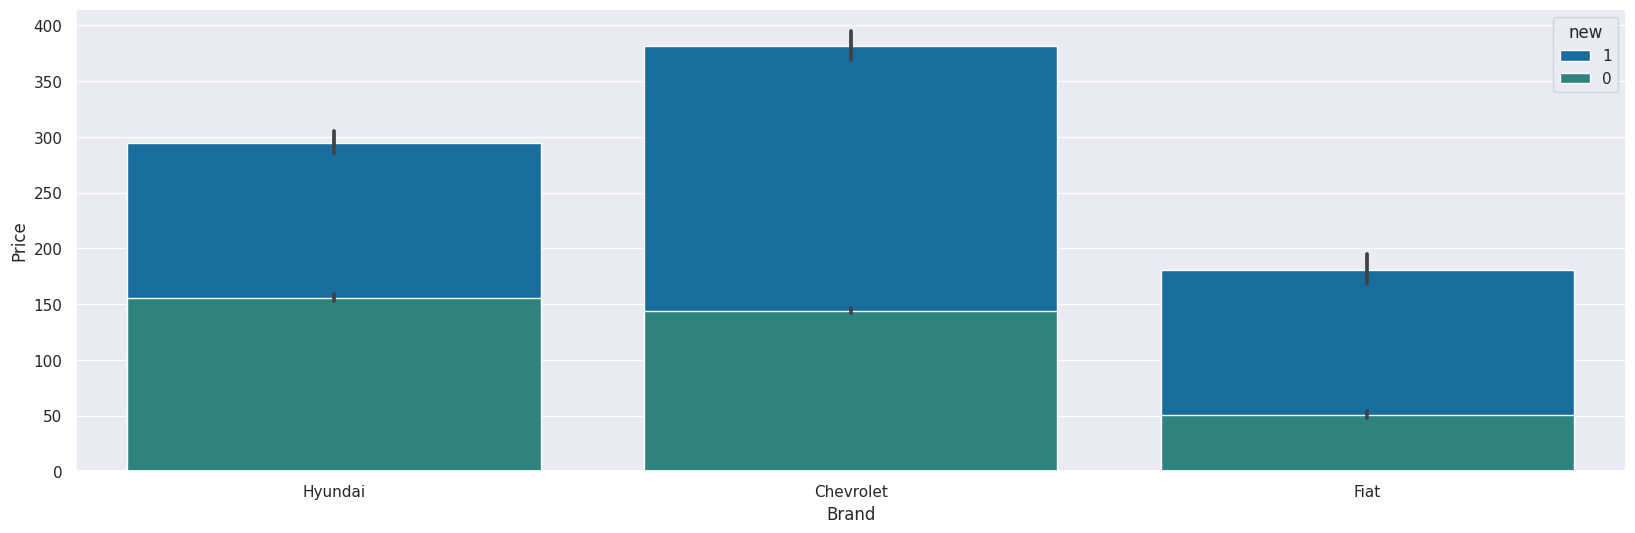

In [187]:
df_copy_cat = df_copy.copy()
df_copy_cat['Brand'] = df_copy_cat['Brand'].apply(lambda e : brands[e])
# getting unique value for old cars brands 
old_cars_brands = df_copy_cat[df_copy_cat['new'] == 0]['Brand'].unique()

# then we will filter the cars' new data by the old cars brands
new_cars = df_copy_cat[df_copy_cat['new'] == 1]
df_new_cars_with_brands = new_cars[new_cars['Brand'].isin(old_cars_brands)].reset_index(drop=True)
old_cars_with_brands = df_copy_cat[df_copy_cat['new'] == 0]

# getting shape for the new cars and the old cars
print("New Cars Shape: ", df_new_cars_with_brands.shape)
print("Old Cars Shape: ", old_cars_with_brands.shape)

# as we show that new cars with defined brands are smaller than the old cars
# so that we need to drop from the old cars and keep same brands distribution

# Compute the size of the original dataframe
original_size = len(old_cars_with_brands)

# Define the percentage of rows to drop (e.g., 60%)
drop_percentage = 0.6

# Compute the number of rows to drop
drop_size = int(original_size * drop_percentage)

# Set a random seed for reproducibility
np.random.seed(42)

# Select the rows to drop using random sampling
drop_indices = np.random.choice(old_cars_with_brands.index, size=drop_size, replace=False)

# Create a new dataframe without the selected rows
df_old_cars = old_cars_with_brands.drop(drop_indices)


# getting shape for the new cars and the old cars
print("Old Cars after drop Shape: ", df_old_cars.shape)


# now we need to compare brands mean for the old cars and the new cars with same brands with plot

# Create a figure and increase the figure size
plt.figure(figsize=(20, 6))


# Create a scatter plot of brand vs. price for the new cars

sns.barplot(data=df_new_cars_with_brands, x="Brand", y="Price", hue= "new", palette="colorblind")

# Create a scatter plot of brand vs. price for the old cars
sns.barplot(data=df_old_cars, x="Brand", y="Price" , hue= "new", palette= 'viridis')


# Show plot
plt.show()

# as we can see the relation between the brand and the price for the old cars and the new cars with same brands
# so we can see that the new cars with same brands are more expensive than the old cars with same brands

Q7. How does inflation affect the popularity of different car brands that are currently listed for sale? (Based on the old and the new datasets)

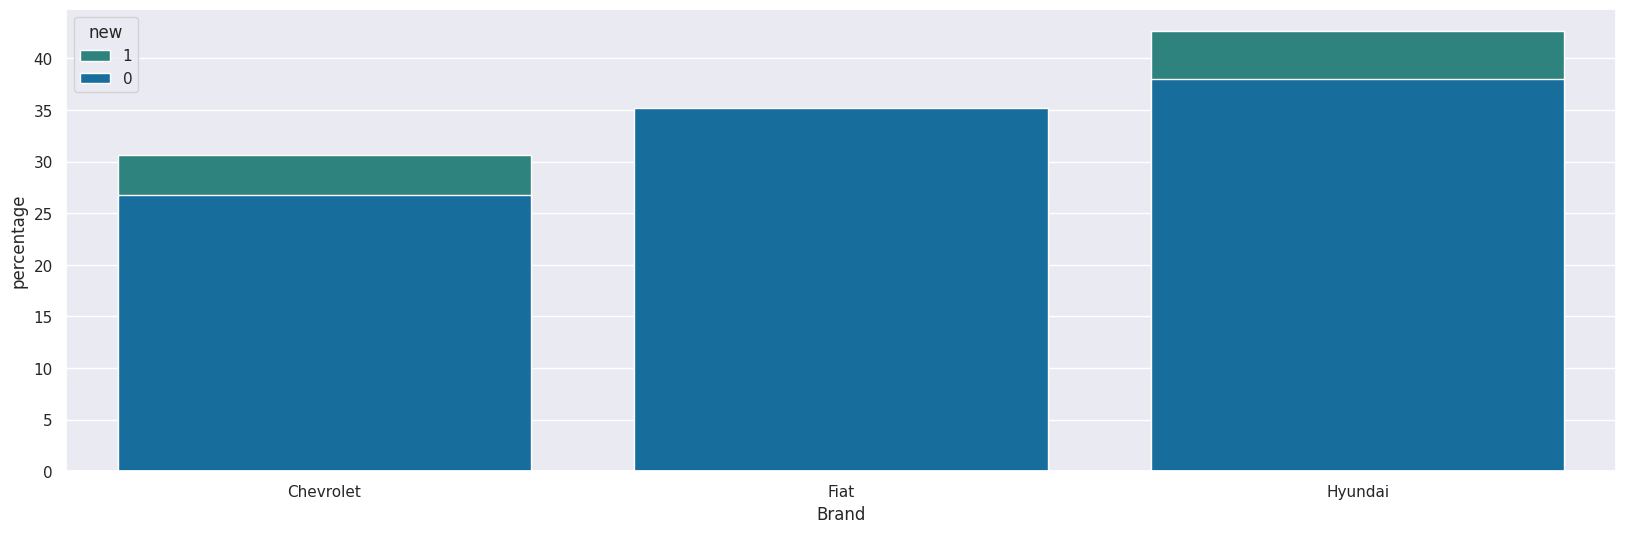

In [200]:
# we need to check brands pobularity for the old cars and the new cars with same brands
# as Q6 we will only check it for ['Hyundai' , 'Chevorlet' , 'Fiat' ]

df_old = df_old_cars.copy()
df_new = df_new_cars_with_brands.copy()

# calculate the percentage of each brand in the old cars
old_percentage = df_old.groupby('Brand')['Brand'].count() / len(df_old) * 100
old_percentage = old_percentage.reset_index(name='percentage')
old_percentage['percentage'] = old_percentage['percentage'].apply(lambda e : round(e, 2))
old_percentage['new'] = 0

# calculate the percentage of each brand in the new cars
new_percentage = df_new.groupby('Brand')['Brand'].count() / len(df_new) * 100
new_percentage = new_percentage.reset_index(name='percentage')
new_percentage['percentage'] = new_percentage['percentage'].apply(lambda e : round(e, 2))
new_percentage['new'] = 1

plt.figure(figsize=(20, 6))

# plot the percentage of each brand in the new cars
sns.barplot(data=new_percentage, x="Brand", y="percentage",hue= "new" , palette="viridis")
# plot the percentage of each brand in the old cars

sns.barplot(data=old_percentage, x="Brand", y="percentage",hue= "new" , palette="colorblind")


# Show plot

plt.show()

# as we can see the percentage of each brand in the old cars and the new cars with same brands
# so that the inflation almost doesn't affect the brands popularity
